Mounting Drive becasue the dataset is in the dirve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary Libraries

In [ ]:

import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Read data from drive

In [ ]:

data_path = '/content/drive/My Drive/crypto_data/coin_Ethereum.csv'
df = pd.read_csv(data_path)


Visualizing the data and related information of the data to start the preprocessing


In [ ]:

df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [ ]:
df.isnull().sum()



SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

This is done to plot the data nicely

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

Plotting the data

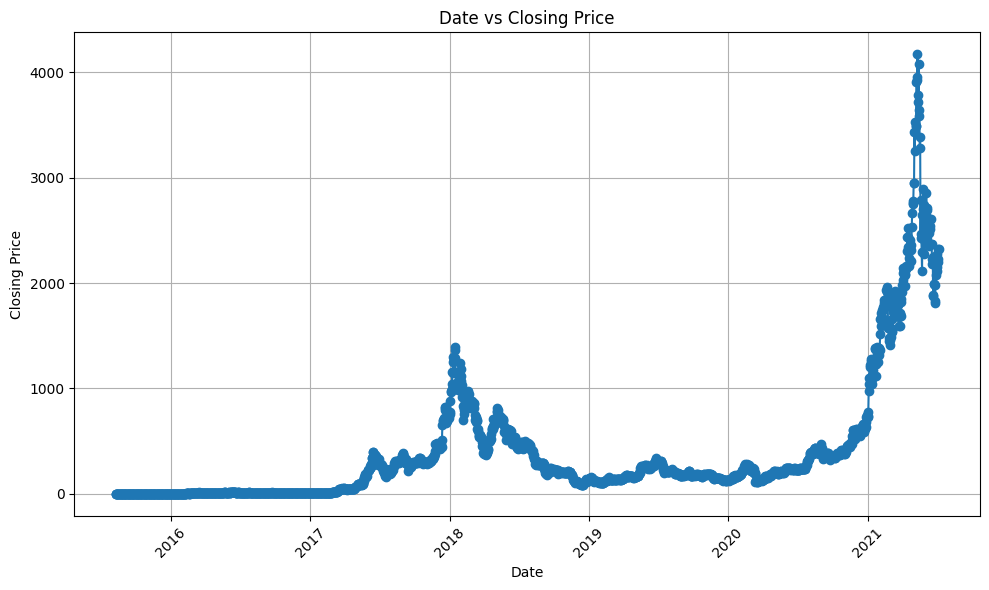

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], marker='o')
plt.title('Date vs Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Preparing the target column

In [ ]:
df['Tomorrow'] = df["Close"].shift(-1)
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Tomorrow
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07,0.701897
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07,0.708448
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07,1.067860
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07,1.217440
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07,1.827670
...,...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,2226.114282
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,2321.724112
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,2198.582464
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,2324.679449


The target column is set to 1 if closing price of tomorrow's stock is higher than today's stock price

In [ ]:
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Tomorrow,Target
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07,0.701897,0
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07,0.708448,1
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07,1.067860,1
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07,1.217440,1
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07,1.827670,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11,2226.114282,1
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11,2321.724112,1
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11,2198.582464,0
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11,2324.679449,1


Dropping irrelevant columns

In [ ]:
df.drop(columns=["Name", "Symbol"], inplace=True)


*Training Random Forest*

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df_copy = df.copy()
X = df_copy.drop(['Tomorrow', 'Target',"Date"], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2160 non-null   int64         
 1   Date       2160 non-null   datetime64[ns]
 2   High       2160 non-null   float64       
 3   Low        2160 non-null   float64       
 4   Open       2160 non-null   float64       
 5   Close      2160 non-null   float64       
 6   Volume     2160 non-null   float64       
 7   Marketcap  2160 non-null   float64       
 8   Tomorrow   2159 non-null   float64       
 9   Target     2160 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 168.9 KB


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.5370370370370371
Precision: 0.5357142857142857
Recall: 0.5555555555555556
F1 Score: 0.5454545454545454


Applying Adaboost to the dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


X = df.drop(columns=['SNo', 'Date', 'Target', 'Tomorrow'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_clf = AdaBoostClassifier()

adaboost_clf.fit(X_train, y_train)

y_pred = adaboost_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.5231481481481481
Precision: 0.5213675213675214
Recall: 0.5648148148148148
F1 Score: 0.5422222222222223


Applying LSTM to the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam




X = df.drop(columns=['SNo', 'Date', 'Target', 'Tomorrow'])  # Features
y = df['Target']


X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/50
54/54 [==============================] - 3s 15ms/step - loss: 0.7021 - accuracy: 0.5104 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 2/50
54/54 [==============================] - 0s 5ms/step - loss: 0.7020 - accuracy: 0.4861 - val_loss: 0.7001 - val_accuracy: 0.4977
Epoch 3/50
54/54 [==============================] - 0s 5ms/step - loss: 0.7002 - accuracy: 0.4977 - val_loss: 0.6992 - val_accuracy: 0.4977
Epoch 4/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5110 - val_loss: 0.6985 - val_accuracy: 0.4977
Epoch 5/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5127 - val_loss: 0.6975 - val_accuracy: 0.4954
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5145 - val_loss: 0.6971 - val_accuracy: 0.4954
Epoch 7/50
54/54 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5156 - val_loss: 0.6967 - val_accuracy: 0.4815
Epoch 8/50
54/54 [=

A stack of LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
54/54 [==============================] - 8s 36ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/50
54/54 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5110 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/50
54/54 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5203 - val_loss: 0.6941 - val_accuracy: 0.5023
Epoch 4/50
54/54 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5260 - val_loss: 0.6945 - val_accuracy: 0.5023
Epoch 5/50
54/54 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5451 - val_loss: 0.6942 - val_accuracy: 0.5023
Epoch 6/50
54/54 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.5266 - val_loss: 0.6944 - val_accuracy: 0.5023
Epoch 7/50
54/54 [==============================] - 1s 10ms/step - loss: 0.6920 - accuracy: 0.5220 - val_loss: 0.6943 - val_accuracy: 0.5023
Epoch 8/50
54/54 [